In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import skew
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
df.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
# Checking for missing values
missing_vals= df.isnull().sum()
print('Missing values per feature:\n',missing_vals[missing_vals>0])

Missing values per feature:
 Series([], dtype: int64)


In [5]:
# Checking class imbalance
print('Class dist:\n',df['Diabetes_012'].value_counts(normalize=True)*100)

Class dist:
 Diabetes_012
0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: proportion, dtype: float64


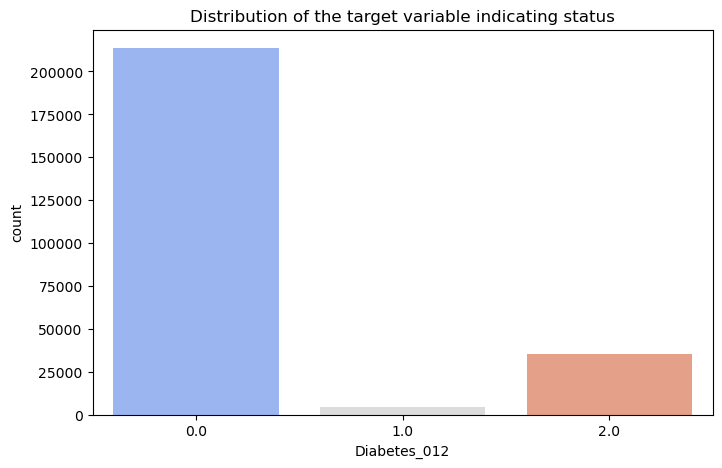

In [6]:
# Class dist for the target feature
plt.figure(figsize=(8,5))
sns.countplot(x=df['Diabetes_012'],palette='coolwarm')
plt.title('Distribution of the target variable indicating status')
plt.show()

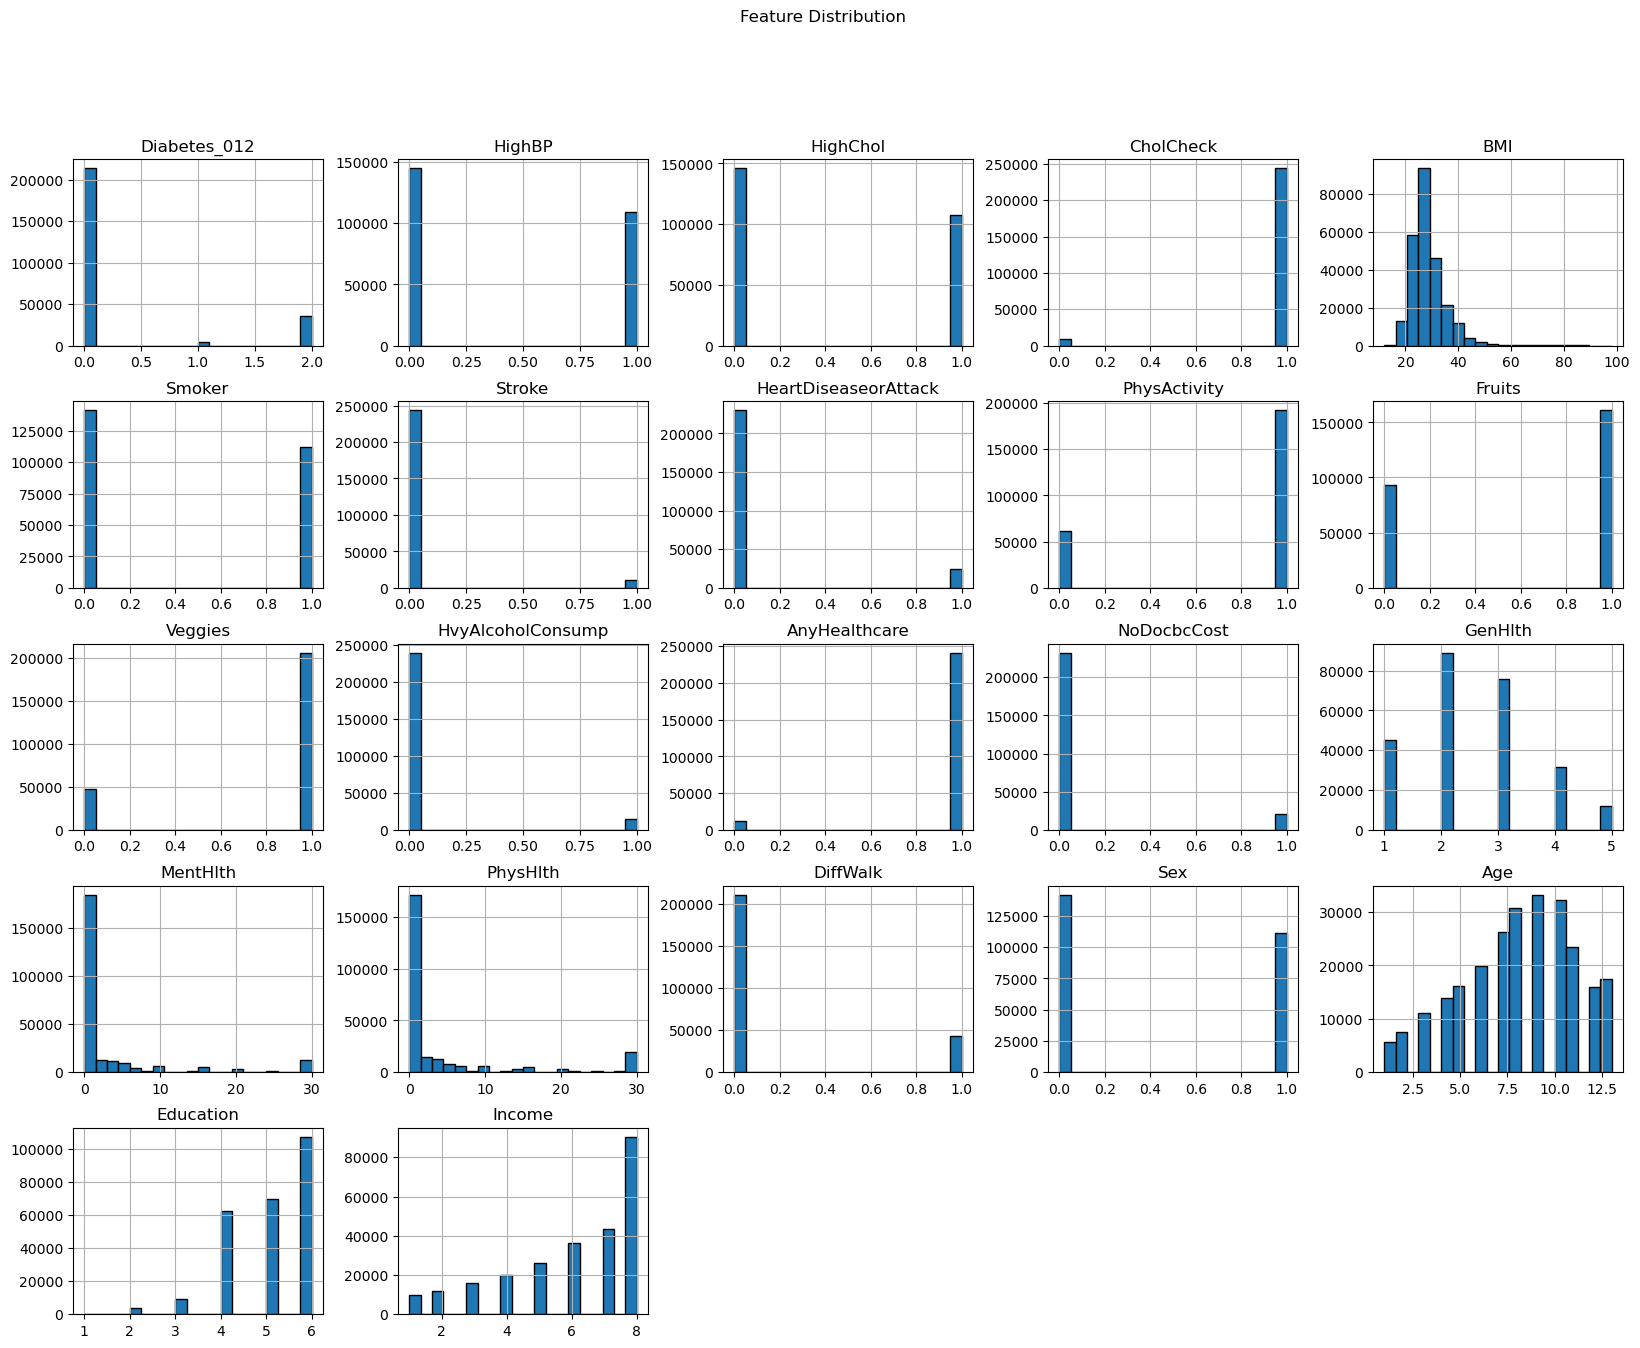

In [7]:
# Feature distributions
df.hist(figsize=(20,15),bins=20,edgecolor='black')
plt.suptitle('Feature Distribution')
plt.show()

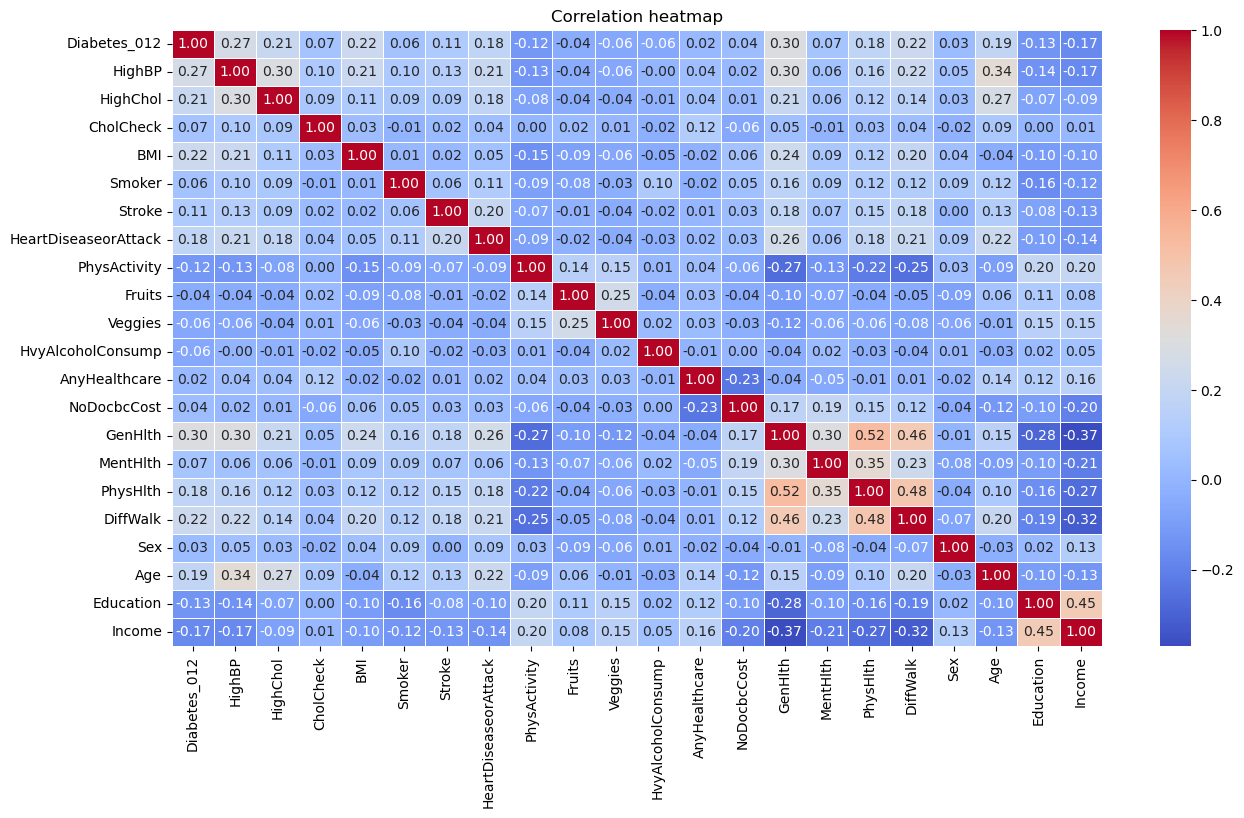

In [8]:
# Correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5,cbar=True)
plt.title('Correlation heatmap')
plt.show()

In [9]:
# Checking skewness
skewness= df.apply(lambda x :skew(x)).sort_values(ascending=False)
print('Feature Skewness:\n',skewness)

Feature Skewness:
 Stroke                  4.657312
HvyAlcoholConsump       3.854109
NoDocbcCost             2.995272
HeartDiseaseorAttack    2.778725
MentHlth                2.721132
PhysHlth                2.207382
BMI                     2.121991
Diabetes_012            1.976379
DiffWalk                1.773897
GenHlth                 0.422864
HighChol                0.307073
HighBP                  0.286903
Sex                     0.240348
Smoker                  0.228809
Age                    -0.359901
Fruits                 -0.557496
Education              -0.777251
Income                 -0.891340
PhysActivity           -1.195539
Veggies                -1.592229
AnyHealthcare          -4.181091
CholCheck              -4.881243
dtype: float64


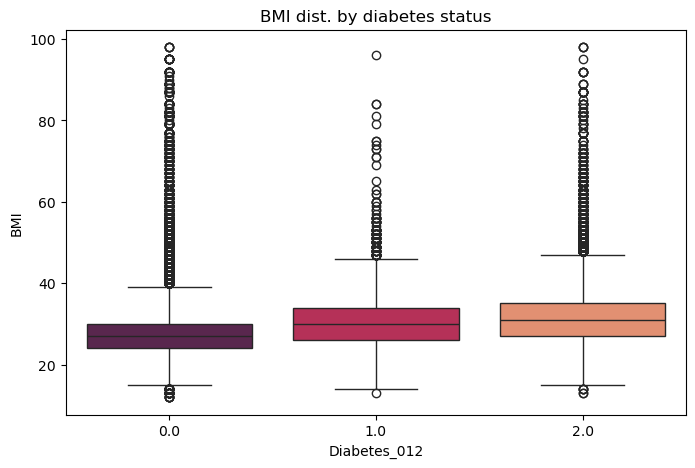

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Diabetes_012'],y=df['BMI'],palette='rocket')
plt.title('BMI dist. by diabetes status')
plt.show()

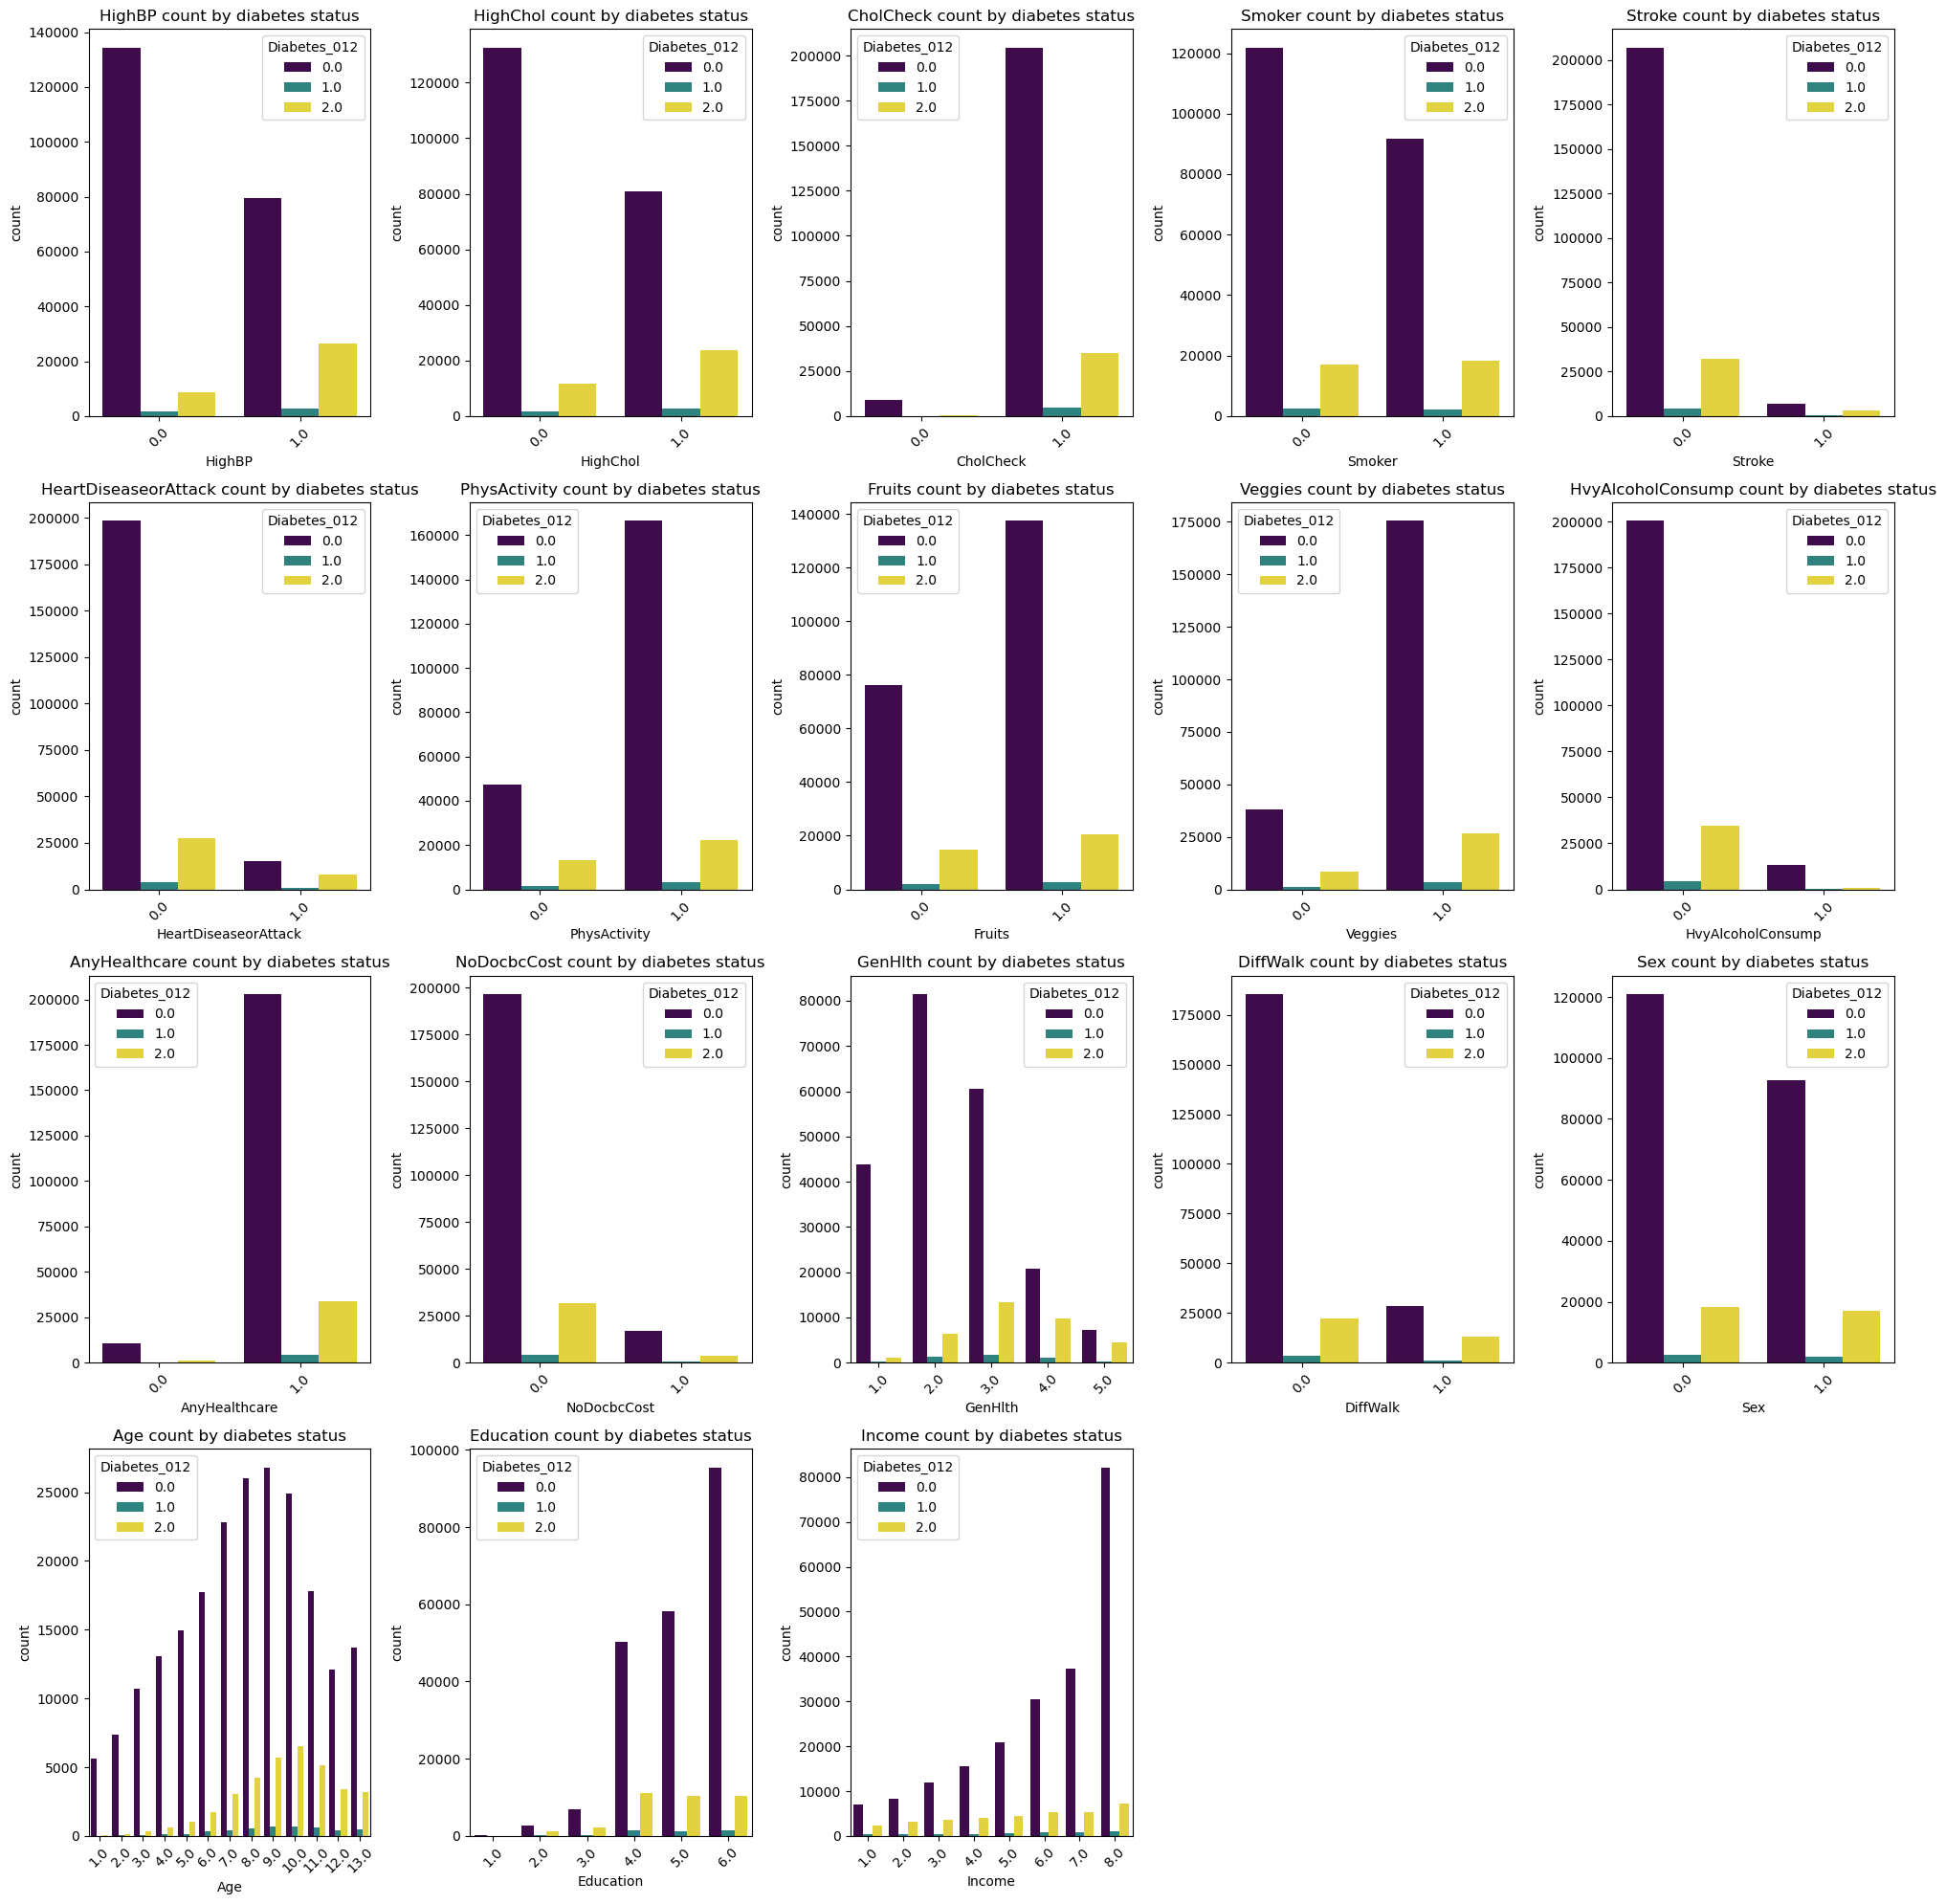

In [11]:
features=[c for c in df.columns if c not in ['Diabetes_012','MentHlth','BMI','PhysHlth']]
num_features= len(features)
cols= 5 
rows= math.ceil(num_features / cols)

fig,axes= plt.subplots(rows,cols,figsize=(20,5*rows))  
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.countplot(x=df[feature], hue=df['Diabetes_012'], palette="viridis", ax=axes[i])
    axes[i].set_title(f"{feature} count by diabetes status")
    axes[i].tick_params(axis='x', rotation=45)  
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()  
plt.show()

In [12]:
all_features= [c for c in df.columns if c!='Diabetes_012']
X= df[all_features]
y= df['Diabetes_012']
X_train,X_test,y_train,y_test= train_test_split(
    X,y,test_size=0.2,stratify=y,random_state=42
)
print(f'Train data shape {X_train.shape}')
print(f'Test data shape {X_test.shape}')

Train data shape (202944, 21)
Test data shape (50736, 21)


In [13]:
# Applying scaling and converting from floating point to integer
scale_cols= ['BMI','MentHlth','PhysHlth','Age']
ordinal_cols= ['Education','Income','GenHlth']
binary_cols= [c for c in all_features if c not in scale_cols + ordinal_cols]
scaler= StandardScaler()
X_train[scale_cols]= scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols]= scaler.transform(X_test[scale_cols])
X_train[binary_cols+ordinal_cols]= X_train[binary_cols+ordinal_cols].astype('int64')
X_test[binary_cols+ordinal_cols]= X_test[binary_cols+ordinal_cols].astype('int64')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202944 entries, 185494 to 110153
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                202944 non-null  int64  
 1   HighChol              202944 non-null  int64  
 2   CholCheck             202944 non-null  int64  
 3   BMI                   202944 non-null  float64
 4   Smoker                202944 non-null  int64  
 5   Stroke                202944 non-null  int64  
 6   HeartDiseaseorAttack  202944 non-null  int64  
 7   PhysActivity          202944 non-null  int64  
 8   Fruits                202944 non-null  int64  
 9   Veggies               202944 non-null  int64  
 10  HvyAlcoholConsump     202944 non-null  int64  
 11  AnyHealthcare         202944 non-null  int64  
 12  NoDocbcCost           202944 non-null  int64  
 13  GenHlth               202944 non-null  int64  
 14  MentHlth              202944 non-null  float64
 15  

In [14]:
X_train.head(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
185494,1,0,1,-0.512552,0,0,0,1,1,1,...,1,0,2,-0.429290,-0.485961,0,1,0.642861,4,4
217030,0,0,1,1.301115,1,0,0,1,1,1,...,1,0,1,-0.429290,-0.485961,0,0,-2.302154,5,5
641,1,1,1,0.998837,0,0,0,1,1,0,...,1,0,2,-0.429290,-0.485961,0,0,0.970085,5,3
217863,0,0,1,-0.210274,0,0,0,1,0,0,...,1,0,2,-0.429290,0.088138,0,1,-1.647706,4,6
53677,0,0,1,-0.059135,1,0,0,1,0,0,...,1,1,3,-0.023967,-0.485961,0,0,0.315637,4,4


In [15]:
# Sampling 
smote= SMOTE(random_state=42)
random_oversampler= RandomOverSampler(random_state=42)
random_undersampler= RandomUnderSampler(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_ros, y_train_ros = random_oversampler.fit_resample(X_train, y_train)
X_train_rus, y_train_rus = random_undersampler.fit_resample(X_train, y_train)
print(f"Original Train Shape: {X_train.shape}")
print(f"After SMOTE: {X_train_smote.shape}")
print(f"After Random Oversampling: {X_train_ros.shape}")
print(f"After Random Undersampling: {X_train_rus.shape}")

Original Train Shape: (202944, 21)
After SMOTE: (512886, 21)
After Random Oversampling: (512886, 21)
After Random Undersampling: (11115, 21)


In [16]:
def print_class_distribution(y, label):
    print(f"{label} Class Distribution:\n{y.value_counts(normalize=True)}\n")

print_class_distribution(y_train, "Original Train")
print_class_distribution(y_train_smote, "SMOTE")
print_class_distribution(y_train_ros, "Random Oversampling")
print_class_distribution(y_train_rus, "Random Undersampling")

Original Train Class Distribution:
Diabetes_012
0.0    0.842410
2.0    0.139334
1.0    0.018256
Name: proportion, dtype: float64

SMOTE Class Distribution:
Diabetes_012
0.0    0.333333
2.0    0.333333
1.0    0.333333
Name: proportion, dtype: float64

Random Oversampling Class Distribution:
Diabetes_012
0.0    0.333333
2.0    0.333333
1.0    0.333333
Name: proportion, dtype: float64

Random Undersampling Class Distribution:
Diabetes_012
0.0    0.333333
1.0    0.333333
2.0    0.333333
Name: proportion, dtype: float64



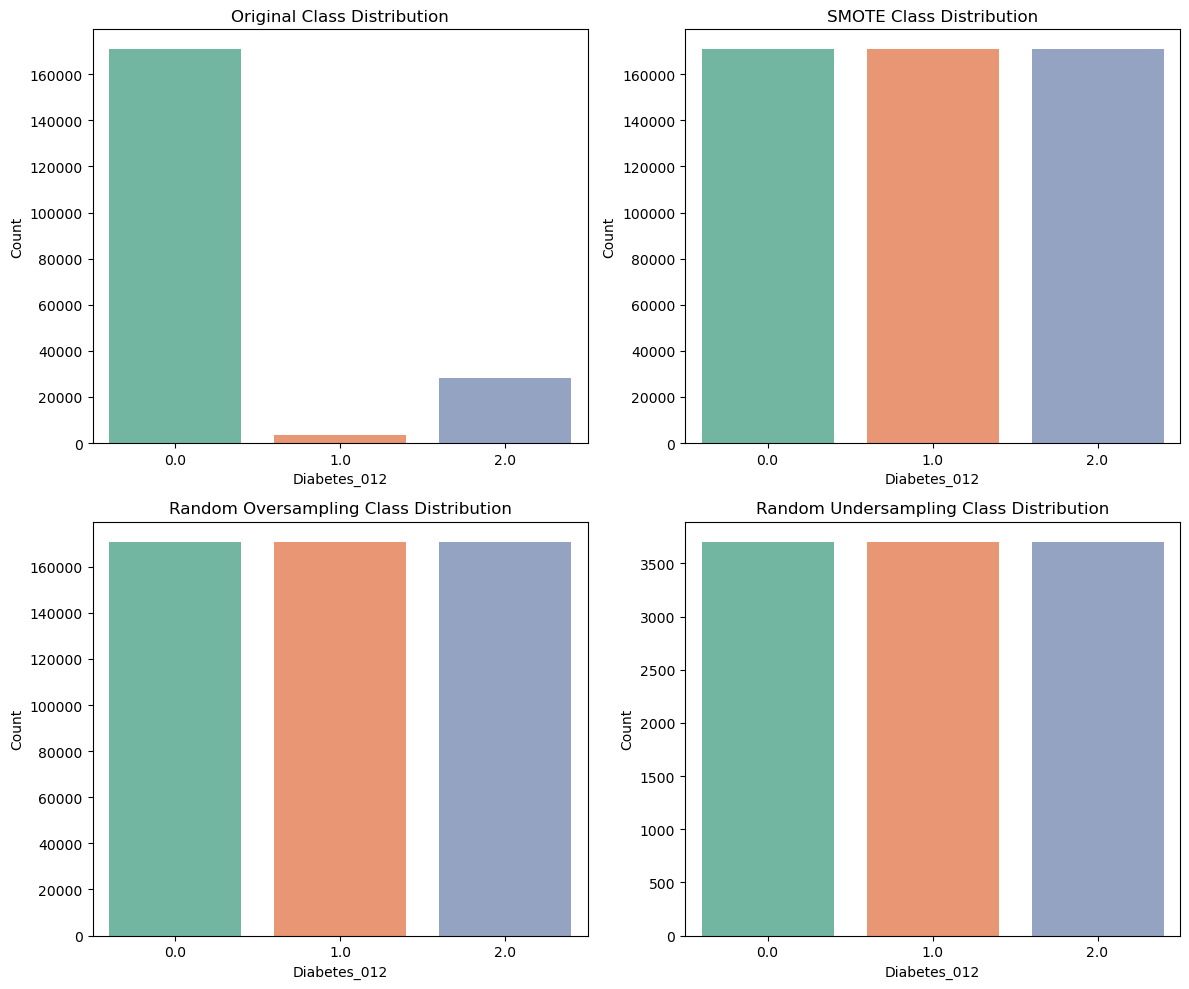

In [17]:
def plot_class_distribution(y_data, title, ax):
    class_counts = Counter(y_data)
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), ax=ax, palette='Set2')
    ax.set_title(title)
    ax.set_xlabel("Diabetes_012")
    ax.set_ylabel("Count")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plot_class_distribution(y_train, "Original Class Distribution", axes[0, 0])
plot_class_distribution(y_train_smote, "SMOTE Class Distribution", axes[0, 1])
plot_class_distribution(y_train_ros, "Random Oversampling Class Distribution", axes[1, 0])
plot_class_distribution(y_train_rus, "Random Undersampling Class Distribution", axes[1, 1])
plt.tight_layout()
plt.show()

In [18]:
# PCA for dimensionality reduction
# Apply PCA on training data (after scaling)
pca_smote = PCA(n_components=0.95, random_state=42)

# Fit PCA on the training set
X_train_smote_pca = pca_smote.fit_transform(X_train_smote)

# Apply the same PCA transformation to the test set
X_test_smote_pca = pca_smote.transform(X_test)
print(f"Original train shape: {X_train.shape}")
print(f"Original test shape: {X_test.shape}")
# Print the new shapes after PCA transformation
print(f"Training Data shape after PCA (SMOTE): {X_train_smote_pca.shape}")
print(f"Test Data shape after PCA (SMOTE): {X_test_smote_pca.shape}")

Original train shape: (202944, 21)
Original test shape: (50736, 21)
Training Data shape after PCA (SMOTE): (512886, 12)
Test Data shape after PCA (SMOTE): (50736, 12)


In [19]:
pca_ros = PCA(n_components=0.95, random_state=42)

# Fit PCA on the training set
X_train_ros_pca = pca_ros.fit_transform(X_train_ros)

# Apply the same PCA transformation to the test set
X_test_ros_pca = pca_ros.transform(X_test)
print(f"Original train shape: {X_train.shape}")
print(f"Original test shape: {X_test.shape}")
# Print the new shapes after PCA transformation
print(f"Training Data shape after PCA (ROS): {X_train_ros_pca.shape}")
print(f"Test Data shape after PCA (ROS): {X_test_ros_pca.shape}")

Original train shape: (202944, 21)
Original test shape: (50736, 21)
Training Data shape after PCA (ROS): (512886, 13)
Test Data shape after PCA (ROS): (50736, 13)


In [20]:
pca_rus = PCA(n_components=0.95, random_state=42)

# Fit PCA on the training set
X_train_rus_pca = pca_rus.fit_transform(X_train_rus)

# Apply the same PCA transformation to the test set
X_test_rus_pca = pca_rus.transform(X_test)
print(f"Original train shape: {X_train.shape}")
print(f"Original test shape: {X_test.shape}")
# Print the new shapes after PCA transformation
print(f"Training Data shape after PCA (RUS): {X_train_rus_pca.shape}")
print(f"Test Data shape after PCA (RUS): {X_test_rus_pca.shape}")

Original train shape: (202944, 21)
Original test shape: (50736, 21)
Training Data shape after PCA (RUS): (11115, 13)
Test Data shape after PCA (RUS): (50736, 13)


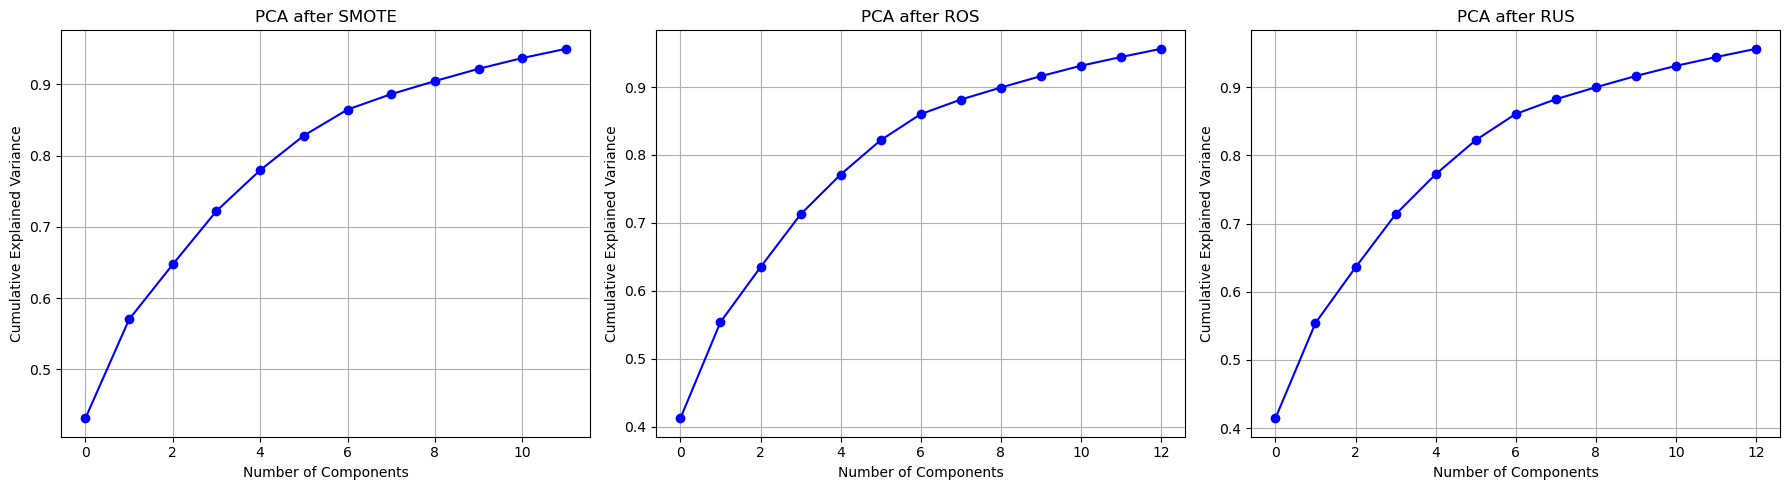

In [21]:
def plot_cumsum_explained_variance(pca, ax, title):
    explained_variance_ratio = pca.explained_variance_ratio_
    cumsum_variance = explained_variance_ratio.cumsum()
    ax.plot(cumsum_variance, marker='o', color='blue')
    ax.set_title(title)
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('Cumulative Explained Variance')
    ax.grid(True)

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for SMOTE PCA
plot_cumsum_explained_variance(pca_smote, axes[0], 'PCA after SMOTE')

# Plot for ROS PCA
plot_cumsum_explained_variance(pca_ros, axes[1], 'PCA after ROS')

# Plot for RUS PCA
plot_cumsum_explained_variance(pca_rus, axes[2], 'PCA after RUS')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_sample_weight


# Your model combinations
combinations = [
    ['LR','XGBoost','LightGBM','RF','AdaBoost','GBT'],
    ['LightGBM'],
    ['XGBoost'],
    ['LR'],
    ['RF'],
    ['AdaBoost'],
    ['GBT'],
    # ['MLP']
]

# X_sample, _, y_sample, _ = train_test_split(
#     X_train_smote, y_train_smote,
#     train_size=350000,
#     stratify=y_train_smote,
#     random_state=42
# )

X_sample = X_train_smote
y_sample = y_train_smote

#Replace these with your actual train/test sets
X_train_final = X_sample
y_train_final = y_sample
X_test_final = X_test
y_test_final = y_test

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_final)

model_pool = {
    'LR': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),
    'KNN': KNeighborsClassifier(),  # No native class_weight support
    'RF': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(random_state=42),  # Uses sample_weight during fit
    'GBT': GradientBoostingClassifier(random_state=42),  # No native class_weight, but can use sample_weight
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42,sample_weight=sample_weights),  # will modify below
    'MLP': MLPClassifier(max_iter=1000, random_state=42, hidden_layer_sizes=(500, 200, 100)),  # no class_weight
    'LightGBM': LGBMClassifier(random_state=42, force_row_wise=True, verbose=-1, class_weight='balanced'),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42, auto_class_weights='Balanced')
}
# Store results
results = []

for combo in combinations:
    estimators = [(name, model_pool[name]) for name in combo]
    clf = VotingClassifier(estimators=estimators, voting='soft')
    clf.fit(X_train_final, y_train_final)
    y_pred = clf.predict(X_test_final)

    # Calculate overall metrics
    accuracy = accuracy_score(y_test_final, y_pred)
    precision = precision_score(y_test_final, y_pred, average='weighted')
    recall = recall_score(y_test_final, y_pred, average='weighted')
    f1 = f1_score(y_test_final, y_pred, average='weighted')

    results.append({
        'Combination': '+'.join(combo),
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    # Print class-wise classification report
    print(f"\n=== Classification Report for {combo} ===")
    print(classification_report(y_test_final, y_pred, digits=4))
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)




=== Classification Report for ['LR', 'XGBoost', 'LightGBM', 'RF', 'AdaBoost', 'GBT'] ===
              precision    recall  f1-score   support

         0.0     0.8961    0.9059    0.9010     42741
         1.0     0.0544    0.0086    0.0149       926
         2.0     0.4298    0.4487    0.4391      7069

    accuracy                         0.8258     50736
   macro avg     0.4601    0.4544    0.4516     50736
weighted avg     0.8158    0.8258    0.8204     50736


=== Classification Report for ['LightGBM'] ===
              precision    recall  f1-score   support

         0.0     0.8721    0.9575    0.9128     42741
         1.0     0.0638    0.0032    0.0062       926
         2.0     0.4890    0.2603    0.3397      7069

    accuracy                         0.8430     50736
   macro avg     0.4750    0.4070    0.4196     50736
weighted avg     0.8040    0.8430    0.8164     50736


=== Classification Report for ['XGBoost'] ===
              precision    recall  f1-score   support

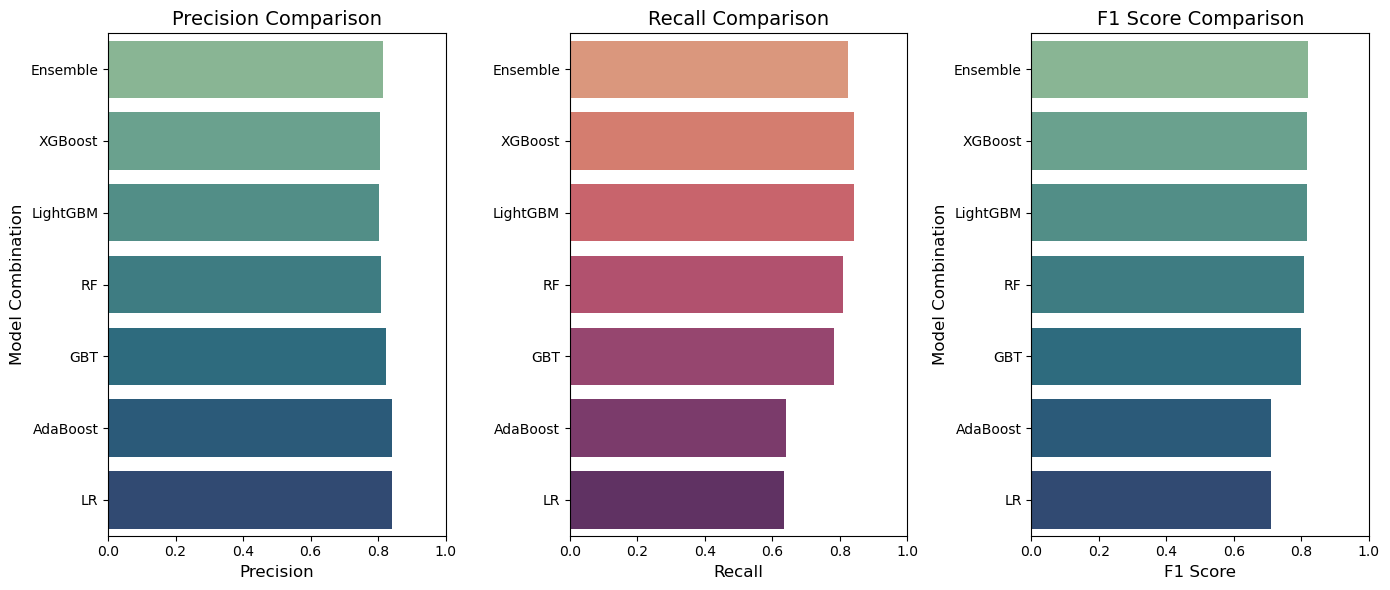

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df = results_df.replace(['LR+XGBoost+LightGBM+RF+AdaBoost+GBT'], 'Ensemble')
plt.figure(figsize=(14, 6))

    
# Precision Score plot
plt.subplot(1, 3, 1)
sns.barplot(data=results_df, x='Precision', y='Combination', palette='crest')
plt.title('Precision Comparison', fontsize=14)
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Model Combination', fontsize=12)
plt.xlim(0, 1)

# Recall plot
plt.subplot(1, 3, 2)
sns.barplot(data=results_df, x='Recall', y='Combination', palette='flare')
plt.title('Recall Comparison', fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('')
plt.xlim(0, 1)

# F1 Score plot
plt.subplot(1, 3, 3)
sns.barplot(data=results_df, x='F1 Score', y='Combination', palette='crest')
plt.title('F1 Score Comparison', fontsize=14)
plt.xlabel('F1 Score', fontsize=12)
plt.ylabel('Model Combination', fontsize=12)
plt.xlim(0, 1)

plt.tight_layout()
plt.show()